# Understanding EU wide trends of home office

In [155]:
import pandas as pd
import numpy as np

In [ ]:
ho_all = pd.read_csv("all_home_office_clean_wna.csv")

In [3]:
ho_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     3780 non-null   object 
 1   2015       2849 non-null   float64
 2   2016       2877 non-null   float64
 3   2017       2917 non-null   float64
 4   2018       2917 non-null   float64
 5   2019       2957 non-null   float64
 6   2020       2874 non-null   float64
 7   2021       3029 non-null   float64
 8   2022       2994 non-null   float64
 9   2023       2983 non-null   float64
 10  2024       2876 non-null   float64
 11  gender     3780 non-null   object 
 12  age_group  3780 non-null   object 
 13  children   3780 non-null   object 
dtypes: float64(10), object(4)
memory usage: 413.6+ KB


In [4]:
ho_all['region'].unique()

array(['European_Union_27_countries_from_2020',
       'Euro_area_20_countries_2015-2022', 'Belgium', 'Bulgaria',
       'Czechia', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Greece',
       'Spain', 'France', 'Croatia', 'Italy', 'Cyprus', 'Latvia',
       'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands',
       'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Slovakia',
       'Finland', 'Sweden', 'Norway', 'United Kingdom',
       'Bosnia and Herzegovina', 'Montenegro', 'North Macedonia',
       'Serbia', 'Türkiye'], dtype=object)

In [5]:
ho_all['gender'].unique()

array(['total', 'male', 'female'], dtype=object)

In [6]:
ho_all['age_group'].unique()

array(['18-24', '18-64', '18+', '20-49', '25-49', '25-54', '55+'],
      dtype=object)

In [7]:
ho_all['children'].unique()

array(['total', '0', '1', '2', '3+'], dtype=object)

In [9]:
ho_all.head()

,region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gender,age_group,children
0,European_Union_27_countries_from_2020,4.5,4.6,4.6,4.7,5.3,10.3,12.4,11.1,10.4,10.0,total,18-24,total
1,Euro_area_20_countries_2015-2022,4.5,4.3,4.6,4.7,5.3,11.1,13.7,12.3,11.0,10.7,total,18-24,total
2,Belgium,8.9,8.6,9.3,9.6,10.3,13.3,16.0,11.9,11.3,11.2,total,18-24,total
3,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,total,18-24,total
4,Czechia,2.7,2.8,3.5,3.9,4.3,4.8,7.3,6.5,10.2,8.4,total,18-24,total


In [ ]:
# dropping all rows with equal or more than 3 null values

ho_all.dropna(thresh=annual_country_ho.shape[1] - 3, inplace=True)

ho_all.reset_index(drop=True, inplace=True)

# Removing the cluster

To focus solely on difference between countries and EU average, we will drop all specific dimensions such as age group, number of children and so on to only get values of 'total'.

That means
- gender = total
- age_group = 18-64
- children = total


In [11]:
total_children_df = ho_all[ho_all['children'] == 'total'].copy()

total_children_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 0 to 3635
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     756 non-null    object 
 1   2015       668 non-null    float64
 2   2016       668 non-null    float64
 3   2017       689 non-null    float64
 4   2018       688 non-null    float64
 5   2019       690 non-null    float64
 6   2020       660 non-null    float64
 7   2021       685 non-null    float64
 8   2022       679 non-null    float64
 9   2023       678 non-null    float64
 10  2024       655 non-null    float64
 11  gender     756 non-null    object 
 12  age_group  756 non-null    object 
 13  children   756 non-null    object 
dtypes: float64(10), object(4)
memory usage: 88.6+ KB


In [12]:
total_children_age_df = total_children_df[total_children_df['age_group'] == '18-64'].copy()

total_children_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 180 to 2735
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     108 non-null    object 
 1   2015       99 non-null     float64
 2   2016       99 non-null     float64
 3   2017       102 non-null    float64
 4   2018       102 non-null    float64
 5   2019       102 non-null    float64
 6   2020       96 non-null     float64
 7   2021       99 non-null     float64
 8   2022       99 non-null     float64
 9   2023       99 non-null     float64
 10  2024       96 non-null     float64
 11  gender     108 non-null    object 
 12  age_group  108 non-null    object 
 13  children   108 non-null    object 
dtypes: float64(10), object(4)
memory usage: 12.7+ KB


In [14]:
total_children_age_gender = total_children_age_df[total_children_age_df['gender'] == 'total'].copy()

total_children_age_gender.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 180 to 215
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     36 non-null     object 
 1   2015       33 non-null     float64
 2   2016       33 non-null     float64
 3   2017       34 non-null     float64
 4   2018       34 non-null     float64
 5   2019       34 non-null     float64
 6   2020       32 non-null     float64
 7   2021       33 non-null     float64
 8   2022       33 non-null     float64
 9   2023       33 non-null     float64
 10  2024       32 non-null     float64
 11  gender     36 non-null     object 
 12  age_group  36 non-null     object 
 13  children   36 non-null     object 
dtypes: float64(10), object(4)
memory usage: 4.2+ KB


In [27]:
annual_country_ho = total_children_age_gender.copy()

In [28]:
annual_country_ho.reset_index(drop=True, inplace=True)

In [29]:
annual_country_ho.head(40)

,region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gender,age_group,children
0,European_Union_27_countries_from_2020,12.9,13.1,13.1,13.5,14.4,20.6,23.3,21.4,21.2,21.7,total,18-64,total
1,Euro_area_20_countries_2015-2022,13.1,13.2,13.4,13.9,14.8,22.1,25.0,23.3,22.9,23.3,total,18-64,total
2,Belgium,22.3,22.7,23.5,22.7,24.7,33.8,40.0,35.6,36.1,36.2,total,18-64,total
3,Bulgaria,1.0,1.1,1.0,0.9,1.1,3.0,6.6,4.5,2.8,3.0,total,18-64,total
4,Czechia,7.6,8.9,9.1,9.4,10.0,13.1,14.5,15.7,15.1,16.5,total,18-64,total
5,Denmark,29.0,34.6,30.8,28.8,29.2,36.6,37.6,34.9,36.2,42.4,total,18-64,total
6,Germany,11.3,11.0,10.8,11.6,12.6,21.0,25.2,24.2,23.4,24.3,total,18-64,total
7,Estonia,13.0,15.0,16.1,19.5,19.8,23.1,26.4,25.7,28.1,29.3,total,18-64,total
8,Ireland,13.4,12.8,16.5,19.4,19.9,32.1,40.2,36.9,37.5,37.1,total,18-64,total
9,Greece,5.6,6.0,5.5,5.1,5.2,10.4,15.9,10.7,7.4,7.9,total,18-64,total


In [30]:
annual_country_ho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     36 non-null     object 
 1   2015       33 non-null     float64
 2   2016       33 non-null     float64
 3   2017       34 non-null     float64
 4   2018       34 non-null     float64
 5   2019       34 non-null     float64
 6   2020       32 non-null     float64
 7   2021       33 non-null     float64
 8   2022       33 non-null     float64
 9   2023       33 non-null     float64
 10  2024       32 non-null     float64
 11  gender     36 non-null     object 
 12  age_group  36 non-null     object 
 13  children   36 non-null     object 
dtypes: float64(10), object(4)
memory usage: 4.1+ KB


In [ ]:
# dropping all with equal or more than 3 null values

annual_country_ho.dropna(thresh=annual_country_ho.shape[1] - 3, inplace=True)

annual_country_ho.reset_index(drop=True, inplace=True)

In [40]:
# filling lone nan values with a value from a previous year

annual_country_ho_nona  = annual_country_ho.ffill(axis=1)


In [41]:
annual_country_ho_nona.head(40)

,region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gender,age_group,children
0,European_Union_27_countries_from_2020,12.9,13.1,13.1,13.5,14.4,20.6,23.3,21.4,21.2,21.7,total,18-64,total
1,Euro_area_20_countries_2015-2022,13.1,13.2,13.4,13.9,14.8,22.1,25.0,23.3,22.9,23.3,total,18-64,total
2,Belgium,22.3,22.7,23.5,22.7,24.7,33.8,40.0,35.6,36.1,36.2,total,18-64,total
3,Bulgaria,1.0,1.1,1.0,0.9,1.1,3.0,6.6,4.5,2.8,3.0,total,18-64,total
4,Czechia,7.6,8.9,9.1,9.4,10.0,13.1,14.5,15.7,15.1,16.5,total,18-64,total
5,Denmark,29.0,34.6,30.8,28.8,29.2,36.6,37.6,34.9,36.2,42.4,total,18-64,total
6,Germany,11.3,11.0,10.8,11.6,12.6,21.0,25.2,24.2,23.4,24.3,total,18-64,total
7,Estonia,13.0,15.0,16.1,19.5,19.8,23.1,26.4,25.7,28.1,29.3,total,18-64,total
8,Ireland,13.4,12.8,16.5,19.4,19.9,32.1,40.2,36.9,37.5,37.1,total,18-64,total
9,Greece,5.6,6.0,5.5,5.1,5.2,10.4,15.9,10.7,7.4,7.9,total,18-64,total


In [42]:
annual_country_ho_nona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   region     31 non-null     object
 1   2015       31 non-null     object
 2   2016       31 non-null     object
 3   2017       31 non-null     object
 4   2018       31 non-null     object
 5   2019       31 non-null     object
 6   2020       31 non-null     object
 7   2021       31 non-null     object
 8   2022       31 non-null     object
 9   2023       31 non-null     object
 10  2024       31 non-null     object
 11  gender     31 non-null     object
 12  age_group  31 non-null     object
 13  children   31 non-null     object
dtypes: object(14)
memory usage: 3.5+ KB


# What has been done

- limited my dataset to only rows that have no diferentiation per demographic (totals only)
- removed countries with equal or more that 4 NAN values (North Macedonia, BiH, Montenegro, Norway, UK)
- Filled lone NAN values with a value from previous year

# Data exploration

Here we will

- Transform data into long format
- Key statistics
- Visualize overall EU trends
- Visualize overall per country trend
- Identify distribution
- Find outlier countries
- Rank countries

In [56]:
annual_countries_wide = annual_country_ho_nona.copy()

In [57]:
annual_countries_long = pd.melt(annual_countries_wide, id_vars=['region', 'gender', 'age_group', 'children'],
                  value_vars=['2015','2016','2017','2018','2019','2020','2021','2022','2023','2024'],
                  var_name='year',
                  value_name='value')

In [58]:
annual_countries_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   region     310 non-null    object
 1   gender     310 non-null    object
 2   age_group  310 non-null    object
 3   children   310 non-null    object
 4   year       310 non-null    object
 5   value      310 non-null    object
dtypes: object(6)
memory usage: 14.7+ KB


In [59]:
annual_countries_long['year'] = pd.to_numeric(annual_countries_long['year'])

annual_countries_long['value'] = pd.to_numeric(annual_countries_long['value'])



In [60]:
annual_countries_long.head()

,region,gender,age_group,children,year,value
0,European_Union_27_countries_from_2020,total,18-64,total,2015,12.9
1,Euro_area_20_countries_2015-2022,total,18-64,total,2015,13.1
2,Belgium,total,18-64,total,2015,22.3
3,Bulgaria,total,18-64,total,2015,1.0
4,Czechia,total,18-64,total,2015,7.6


In [68]:
annual_countries_long_countries = annual_countries_long[~annual_countries_long['region'].isin(['European_Union_27_countries_from_2020', 'Euro_area_20_countries_2015-2022'])]

In [69]:
annual_countries_long_countries['value'].describe()


count    290.000000
mean      17.499655
std       12.383948
min        0.600000
25%        7.125000
50%       14.050000
75%       26.925000
max       50.400000
Name: value, dtype: float64

EDA per countries:

- Average percent of adults working from home in EU over all years are 17.5.

- Standard deviation is about 12.4, indicating that the values are fairly spread out from the mean

- Lowest percent of adults working from home is 0.6.

- 25% of the values are at or below 7.1.

- The median percent of adults working from home across EU over all years is 14. Since the mean (17.5) is higher than the median (14), the data is likely skewed to the right (has a longer tail on the higher end).

- 75% of the values are at or below 27.

- The highest percent of adults working from home in the dataset is 50.4.

In [71]:
EU_average_long = annual_countries_long[annual_countries_long['region'] == 'European_Union_27_countries_from_2020']

In [72]:
EU_average_long['value'].describe()

count    10.000000
mean     17.520000
std       4.413061
min      12.900000
25%      13.200000
50%      17.500000
75%      21.350000
max      23.300000
Name: value, dtype: float64

EDA per EU average:

- Average percent of adults working from home in EU over all years are 17.5.

- Standard deviation is about 4.4, indicating that the values are not spread out far from the mean

- Lowest percent of adults working from home is 12.9.

- 25% of the values are at or below 13.2.

- The median percent of adults working from home across EU over all years is 17.5. Since the mean (17.5) the same as median, the data is likely normally distributed.

- 75% of the values are at or below 27.

- The highest percent of adults working from home in the dataset is 23.3.

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='year', ylabel='value'>

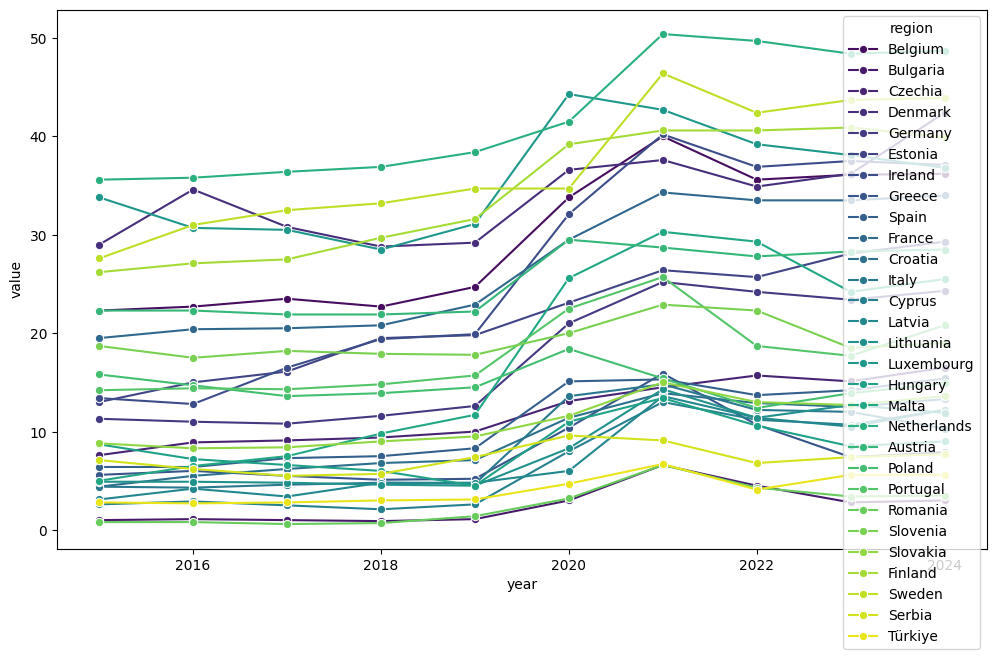

In [73]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=annual_countries_long_countries, x='year', y='value', hue='region', marker='o', palette='viridis')

/var/folders/gt/qx94m45d4t1_dn0smm6xb0p40000gn/T/ipykernel_14079/3019675999.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=EU_average_long, x='year', y='value', marker='o', palette='viridis')


<Axes: xlabel='year', ylabel='value'>

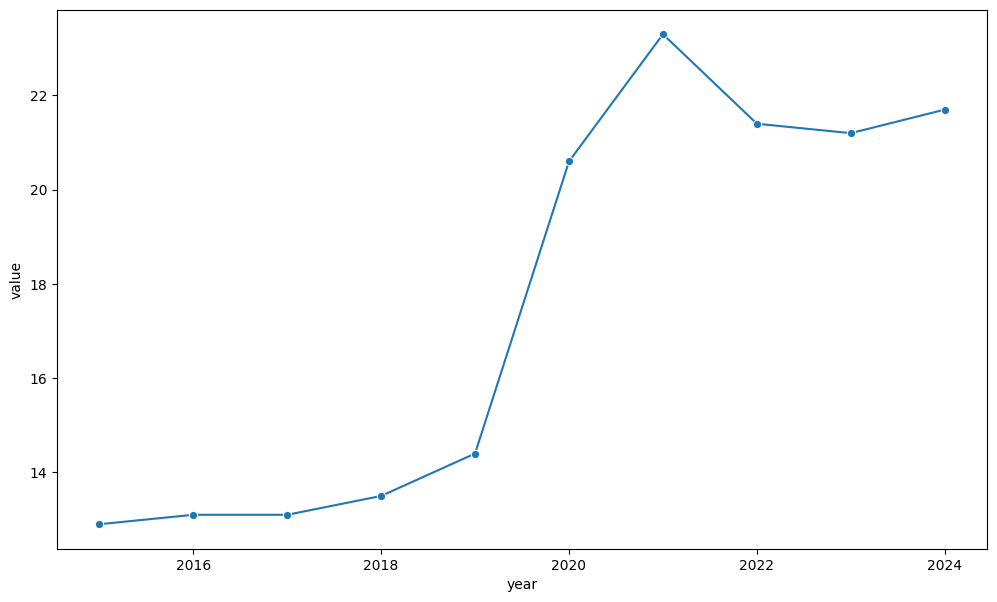

In [76]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=EU_average_long, x='year', y='value', marker='o', palette='viridis')

/var/folders/gt/qx94m45d4t1_dn0smm6xb0p40000gn/T/ipykernel_14079/274625240.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=EU_average_long, x='year', y='value', marker='o', palette='viridis')


(0.0, 100.0)

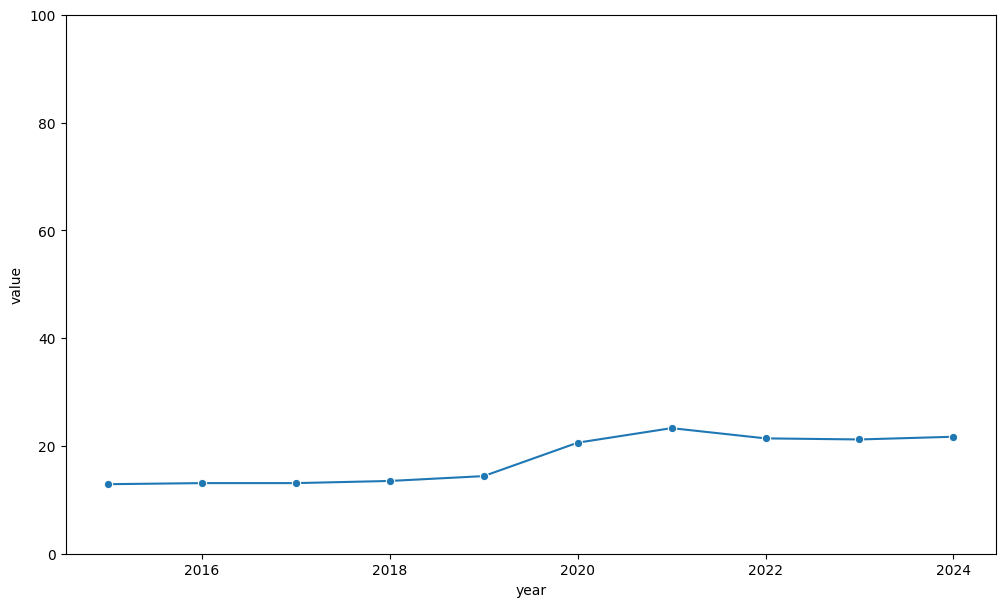

In [75]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=EU_average_long, x='year', y='value', marker='o', palette='viridis')
plt.ylim(0, 100)

In [77]:
annual_countries_long_countries.to_csv('annual_countries_long_countries.csv', index=False)

# From DB

## These are average values for countries for all years

- Bulgaria	2.5
- Romania	2.5300000000000002
- Türkiye	4.11
- Cyprus	6.780000000000001
- Serbia	7.25
- Latvia	7.4
- Greece	7.9700000000000015
- Lithuania	8.23
- Hungary	8.55
- Italy	8.57
- Croatia	9.4
- Spain	10.960000000000003
- Slovakia	10.989999999999998
- Czechia	11.989999999999998
- Poland	14.750000000000004
- Malta	17.54
- Germany	17.540000000000003
- Portugal	17.880000000000003
- Slovenia	19.28
- Estonia	21.6
- Austria	25.340000000000003
- Ireland	26.580000000000002
- France	26.889999999999997
- Belgium	29.759999999999998
- Denmark	34.01
- Finland	34.33
- Luxembourg	35.57
- Sweden	37.01
- Netherlands	42.17999999999999

# Making clusters

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [104]:
df = annual_countries_long_countries[['region', 'year', 'value']]

pivot_df = df.pivot(index='region', columns='year', values='value')

scaler = StandardScaler()
pivot_scaled = scaler.fit_transform(pivot_df)

pivot_df.head(10)

year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
region,,,,,,,,,,
Austria,22.3,22.3,21.9,21.9,22.2,29.5,28.7,27.8,28.3,28.5
Belgium,22.3,22.7,23.5,22.7,24.7,33.8,40.0,35.6,36.1,36.2
Bulgaria,1.0,1.1,1.0,0.9,1.1,3.0,6.6,4.5,2.8,3.0
Croatia,4.4,5.5,6.2,6.8,7.1,11.4,13.9,12.9,12.5,13.3
Cyprus,2.6,2.9,2.5,2.1,2.6,8.0,13.0,11.2,10.7,12.2
Czechia,7.6,8.9,9.1,9.4,10.0,13.1,14.5,15.7,15.1,16.5
Denmark,29.0,34.6,30.8,28.8,29.2,36.6,37.6,34.9,36.2,42.4
Estonia,13.0,15.0,16.1,19.5,19.8,23.1,26.4,25.7,28.1,29.3
Finland,26.2,27.1,27.5,29.7,31.6,39.2,40.6,40.6,40.9,39.9


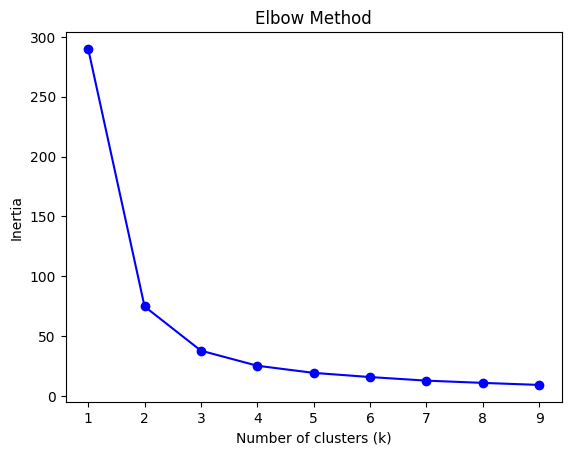

In [105]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pivot_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [143]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
pivot_df['cluster'] = kmeans.fit_predict(pivot_scaled)

In [144]:
df_with_clusters = df.merge(
    pivot_df['cluster'].reset_index(),
    on='region',
    how='left'
)

In [145]:
df_with_clusters.head(-20)

,region,year,value,cluster
0,Belgium,2015,22.3,1
1,Bulgaria,2015,1.0,2
2,Czechia,2015,7.6,2
3,Denmark,2015,29.0,1
4,Germany,2015,11.3,0
...,...,...,...,...
265,Germany,2024,24.3,0
266,Estonia,2024,29.3,0
267,Ireland,2024,37.1,0
268,Greece,2024,7.9,2


In [146]:
# checking if country has same cluster

df_with_clusters[df_with_clusters['region'] == 'Belgium']

,region,year,value,cluster
0,Belgium,2015,22.3,1
29,Belgium,2016,22.7,1
58,Belgium,2017,23.5,1
87,Belgium,2018,22.7,1
116,Belgium,2019,24.7,1
145,Belgium,2020,33.8,1
174,Belgium,2021,40.0,1
203,Belgium,2022,35.6,1
232,Belgium,2023,36.1,1
261,Belgium,2024,36.2,1


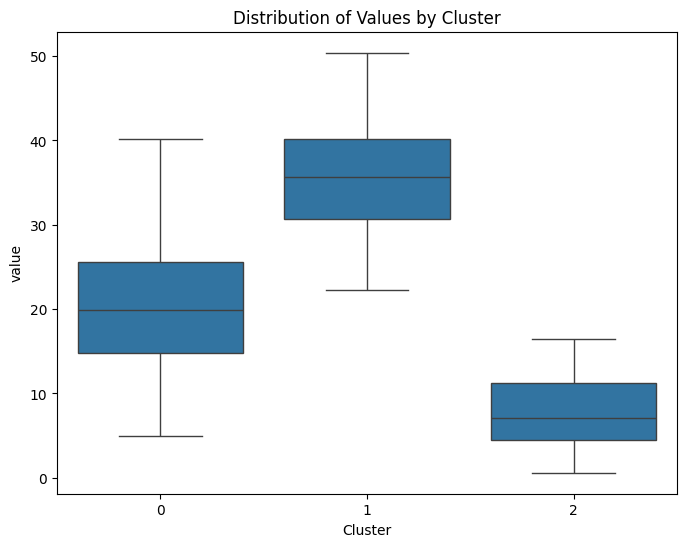

In [147]:
plt.figure(figsize=(8,6))
sns.boxplot(x='cluster', y='value', data=df_with_clusters)
plt.title('Distribution of Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('value')
plt.show()

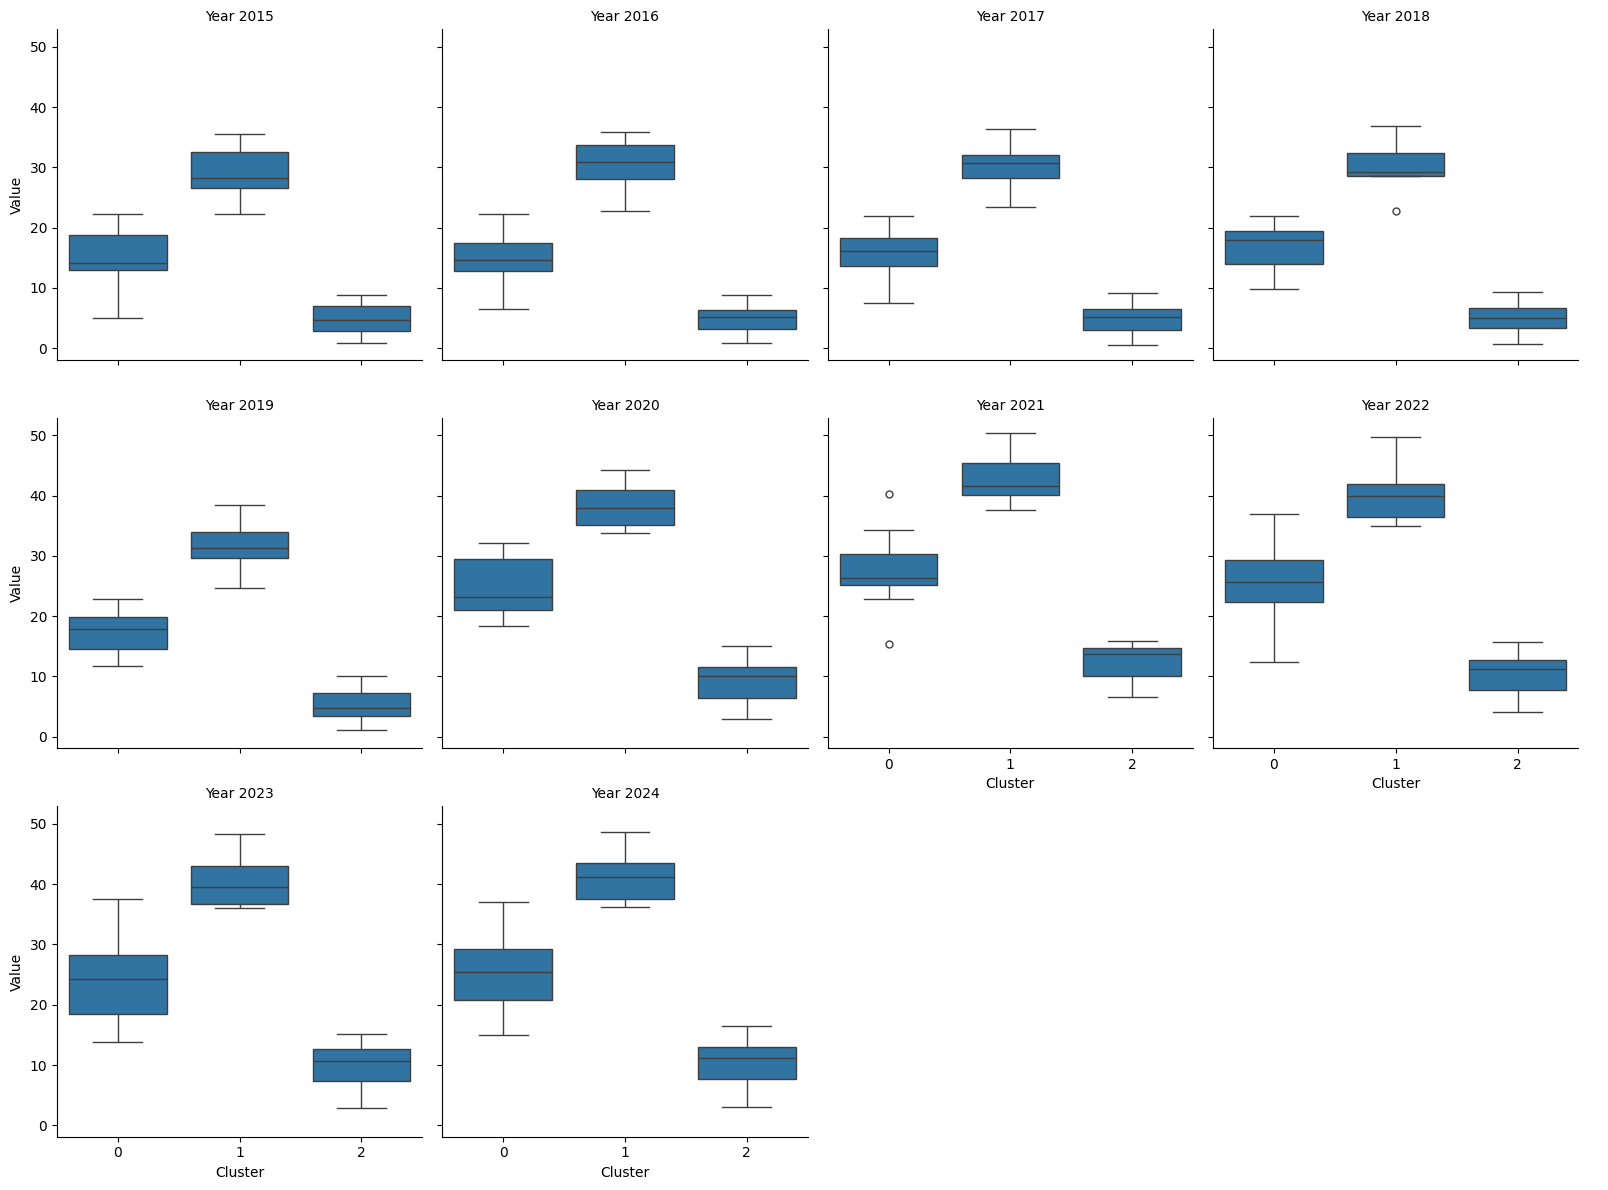

In [148]:
g = sns.catplot(
    x='cluster', y='value',
    col='year',
    data=df_with_clusters,
    kind='box',
    col_wrap=4,  # adjust depending on number of years
    height=4
)
g.set_titles("Year {col_name}")
g.set_axis_labels("Cluster", "Value")
plt.show()

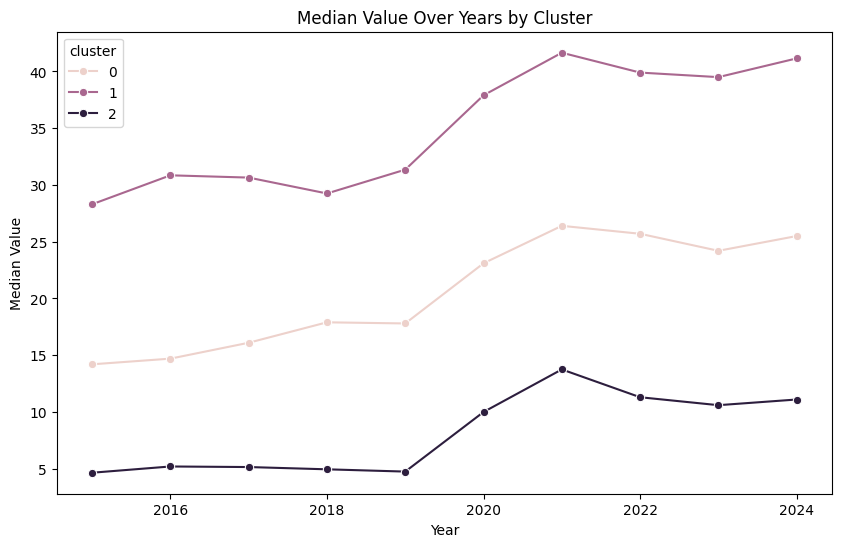

In [149]:
median_values = (
    df_with_clusters.groupby(['cluster', 'year'])['value']
    .median()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='value', hue='cluster', data=median_values, marker='o')
plt.title('Median Value Over Years by Cluster')
plt.xlabel('Year')
plt.ylabel('Median Value')
plt.show()

In [150]:
df_with_clusters.head()

,region,year,value,cluster
0,Belgium,2015,22.3,1
1,Bulgaria,2015,1.0,2
2,Czechia,2015,7.6,2
3,Denmark,2015,29.0,1
4,Germany,2015,11.3,0


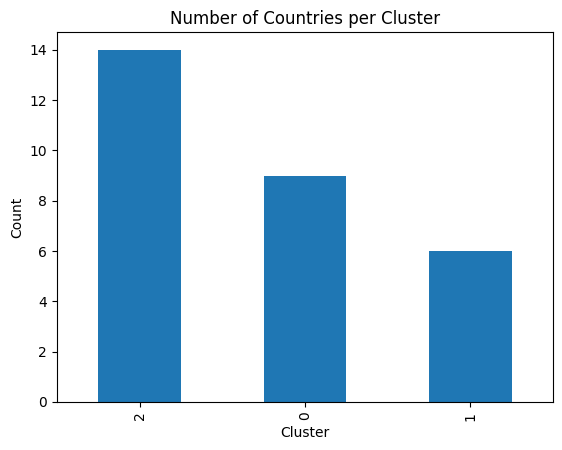

In [151]:
df_with_clusters[['region', 'cluster']].drop_duplicates().cluster.value_counts().plot(kind='bar')
plt.title('Number of Countries per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [152]:
country_clusters = df_with_clusters[['region', 'cluster']].drop_duplicates()
country_clusters = country_clusters.sort_values('cluster').reset_index(drop=True)
print(country_clusters)

         region  cluster
0      Slovenia        0
1       Austria        0
2        Poland        0
3      Portugal        0
4        France        0
5       Ireland        0
6         Malta        0
7       Germany        0
8       Estonia        0
9    Luxembourg        1
10      Denmark        1
11      Finland        1
12       Sweden        1
13  Netherlands        1
14      Belgium        1
15     Slovakia        2
16      Romania        2
17    Lithuania        2
18       Serbia        2
19       Latvia        2
20       Cyprus        2
21        Italy        2
22      Croatia        2
23        Spain        2
24       Greece        2
25      Czechia        2
26     Bulgaria        2
27      Hungary        2
28      Türkiye        2


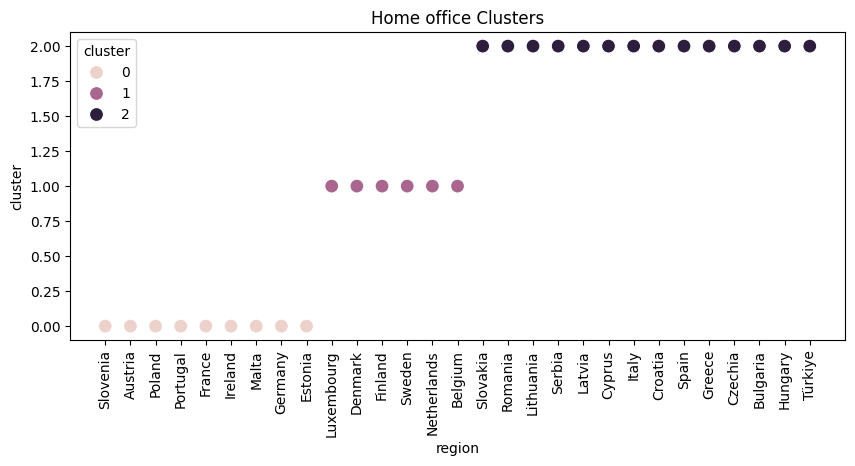

In [154]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=country_clusters, x='region', y='cluster', hue='cluster', s=100)
plt.xticks(rotation=90)
plt.title('Home office Clusters')
plt.show()